In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 99% 706M/715M [00:04<00:00, 172MB/s]
100% 715M/715M [00:04<00:00, 161MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile

dataset='/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.1 MB/s eta 0:00:00


In [ ]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z',mode='r')

archive.extractall()   #archive.extractall(path='')
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


## Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames=os.listdir('/content/train')
type(filenames)

list

In [ ]:
len(filenames)  # How many images are present

50000

In [ ]:
print(filenames[0:5])

['42951.png', '48598.png', '31618.png', '12980.png', '31959.png']


## Labels Processing

In [ ]:
labels=pd.read_csv('/content/trainLabels.csv')
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels.shape

(50000, 2)

In [ ]:
labels[labels['id']==17852]

,id,label
17851,17852,bird


In [ ]:
labels[labels['label']=='frog'].value_counts().sum()

5000

In [ ]:
labels['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_renamed={
    'frog'    :      0,
    'truck'     :    1,
    'deer'        :  2 ,
    'automobile'   : 3,
    'bird'         : 4,
    'horse'        : 5,
    'ship'        :  6,
    'cat'          : 7,
    'dog'          : 8,
    'airplane'     : 9

}

In [ ]:
labels['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [ ]:
Labels=[labels_renamed[i] for i in labels['label']]

In [ ]:
print(Labels[0:5])

[0, 1, 1, 2, 3]


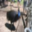

In [ ]:
img=cv2.imread('/content/train/17852.png') # imread is used to convert the image into numpy array
from google.colab.patches import cv2_imshow
cv2_imshow(img)

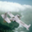

In [ ]:
img1=cv2.imread('/content/train/3645.png')
cv2_imshow(img1)

In [ ]:
labels['label'][3645]

'bird'

In [ ]:
id_list=list(labels['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
# convert images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

In [ ]:
len(data)

In [ ]:
type(data[0])

In [ ]:
data[0].shape

In [ ]:
data[0]

In [ ]:
# converting the images list and images to  np array

x=np.array(data)
y=np.array(Labels)

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
#Scaling the data

x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_classes=10

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),    # 3 is colored image
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [ ]:
#Training

model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

## ResNet50

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

## imagenet data is similar data to CIFAAR-10

In [ ]:
convolution_base=ResNet50(weights='imagenet',  #imagenet is the data the model is trained, we will be using the weight the model has derived from training the  data imagenet
                        include_top=False,   # droping out the ouput neuron class size (1000) but ours is 10
                        input_shape=(256,256,3))


convolution_base.summary()

In [ ]:
num_classes=10

model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))   # the height and width is multiplied by 2 times  32x2=64  scaling up the image
model.add(layers.UpSampling2D((2,2)))    # 64x2 =128
model.add(layers.UpSampling2D((2,2)))    # 128x2=256 hence got required size
model.add(convolution_base)
model.add(layers.Flatten())               # converting everything into single vector
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())          # batch normalization is to normalize the data , after the data goes through the neural network the batch noramlize will normalize it
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))                  #Dropout will turn off neuron so the model won't be overfittting
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [ ]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 468s 384ms/step - loss: 2.1488 - acc: 0.2254 - val_loss: 1.7975 - val_acc: 0.2970
Epoch 2/10
1125/1125 [==============================] - 435s 387ms/step - loss: 1.4895 - acc: 0.4606 - val_loss: 1.7018 - val_acc: 0.4110
Epoch 3/10
1125/1125 [==============================] - 436s 387ms/step - loss: 1.2312 - acc: 0.5735 - val_loss: 1.0354 - val_acc: 0.6255
Epoch 4/10
1125/1125 [==============================] - 442s 393ms/step - loss: 1.0718 - acc: 0.6314 - val_loss: 0.9419 - val_acc: 0.6610
Epoch 5/10
1125/1125 [==============================] - 436s 387ms/step - loss: 0.9647 - acc: 0.6764 - val_loss: 1.0000 - val_acc: 0.6590
Epoch 6/10
1125/1125 [==============================] - 443s 394ms/step - loss: 0.8775 - acc: 0.7057 - val_loss: 0.9406 - val_acc: 0.6812
Epoch 7/10
1125/1125 [==============================] - 443s 393ms/step - loss: 0.8006 - acc: 0.7344 - val_loss: 0.9063 - val_acc: 0.6975
Epoch 8/10
1125/1125 [============

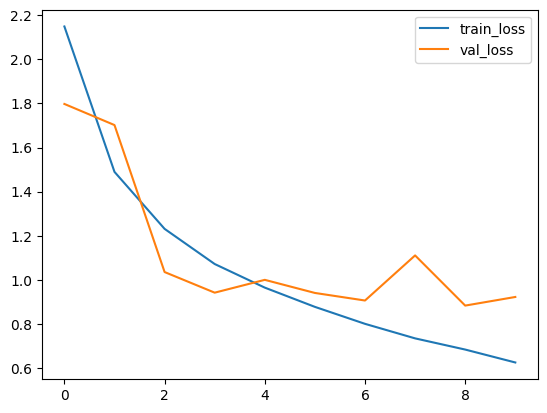

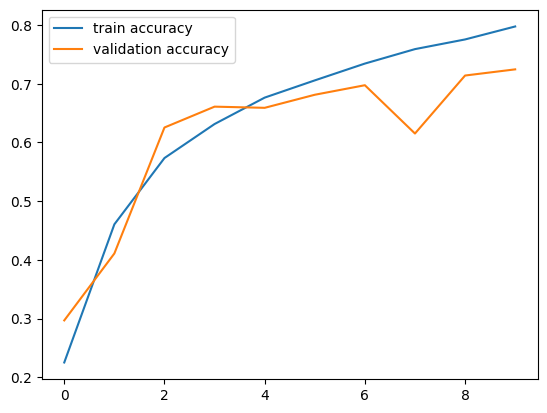

In [ ]:
h=history
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()